# 1. &nbsp; Enzyme kinetics & Michaelis-Menten approximation

The following scheme describes a basic enzymatic reaction, with the set of ODEs provided as well:

<div style="display: flex; justify-content: space-around;">
<div style="width: 30%;">

$$
\text{Rate equation scheme}
$$

$$
\begin{align*}
S + E \xrightleftharpoons[k_{-1}]{k_1} C \xrightarrow{k_2} E + P
\end{align*}
$$

</div>
<div style="width: 60%;">

$$
\text{System of ODEs}
$$

$$
\begin{align*}
\text{I}. & \quad \dot{[S]} = -k_1 [S][E] + k_{-1} [C] \\
\text{II}. & \quad \dot{[E]} = -k_1 [S][E] + [C] \left( k_{-1} + k_2 \right) \\
\text{III}. & \quad \dot{[C]} = k_1 [S][E] - [C] \left( k_{-1} + k_2 \right) \\
\text{IV}. & \quad \dot{[P]} = k_2 [C]
\end{align*}
$$

</div>
</div>

Here, the reacting species are the substrate $S$, the enzyme $E$, the substrate-enzyme complex $C$ and the product $P$. In this basic scheme, complex formation is a reversible reaction while product formation is irreversible.

The initial conditions are set to $S(0) = 10$, $E(0) = E_T$, $C(0) = 0$ and $P(0) = 0$. The parameter values are $E_T = 1$, $k_1 = 1$, $k_{-1} = 1$ and $k_2 = 1$. After numerically solving the ODEs, the solutions for all four species are plotted as a function of time, with the final time set to $t = 30$.

In [46]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# FIGURE INITIALIZATION
fig = plt.figure(figsize=(12, 6), dpi=300)
gs = plt.GridSpec(2, 2)

# GENERAL PARAMETERS
t_span = [0, 30]  # time span
t_eval = np.linspace(*t_span, 3000)  # time points for plotting

In [ ]:
# INITIAL CONDITION
E_T = 1  # total enzyme concentration
S_0 = 10  # initial substrate
E_0 = E_T  # initial enzyme = total enzyme
C_0 = 0  # initial complex
P_0 = 0  # initial product

y0 = [S_0, E_0, C_0, P_0]  # substrate, enzyme, complex, product

k_on = 1  # complex formation
k_off = 1  # complex dissociation
k_prod = 1  # product formation

p = [k_on, k_off, k_prod]  # parameters

def ode(t, y, k_on, k_off, k_prod):
    dydt = np.array([
        -k_on * y[0] * y[1] + k_off * y[2],
        -k_on * y[0] * y[1] + y[2] * (k_off + k_prod),
        k_on * y[0] * y[1] - y[2] * (k_off + k_prod),
        k_prod * y[2]
    ])
    return dydt

results = solve_ivp(ode, t_span, y0, t_eval=t_eval, args=p)  # solve the IVP

ax = fig.add_subplot(gs[0, 0])
ax.plot(results.t, np.column_stack(results.y), label=["S (substrate)", "E (enzyme)", "C (complex)", "P (product)"])
ax.set_title("Numerical solution of the full system")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

The Michaelis-Menten approximation is based on a quasi-steady state assumption for the dynamics of the substrate-enzyme complex. This means $C$ is in steady state relative
to the dynamics of the other species. Following this assumption, the dynamics of the complex, enzyme and product as a function of the substrate concentration are given as follows:

$$
C = \frac{E_T S}{K_m + S}, \quad E = E_T - C, \quad P = S(0) - S - C
$$

Here, $K_m = \frac{k_{-1} + k_2}{k_1}$. These quantities are calculated using the numerical solution for $S$ and compared graphically with the original solution.

In [ ]:
K_m = (k_off + k_prod) / k_on  # Michaelis-Menten constant
S = results.y[0]  # use the numerical solution for S

C = (E_T * S) / (K_m + S)
E = E_T - C
P = S_0 - S - C

ax = fig.add_subplot(gs[1, 0])
ax.plot(results.t, S, linestyle="dashed")
ax.plot(results.t, E, label="E (enzyme)")
ax.plot(results.t, C, label="C (complex)")
ax.plot(results.t, P, label="P (product)")
ax.set_title("Michaelis-Menten approximation")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

Setting the time axis to a $\log$ scale reveals where the Michaelis-Menten approximation fails. A discrepancy can be observed for short time scales, which is a result of the quasi-steady-state assumption for the substrate-enzyme complex. There is an initial build-up of complex from free substrate and enzyme which is not captured. As soon as a quasi-steady state is reached, the Michaelis-Menten approximation yields good results.

In [ ]:
ax = fig.add_subplot(gs[:, 1])
ax.plot(results.t, np.column_stack(results.y), label=["S (substrate)", "E (enzyme)", "C (complex)", "P (product)"])
ax.plot(results.t, E, linestyle="dashed", color="tab:purple", label="E (enzyme)")
ax.plot(results.t, C, linestyle="dashed", color="tab:red", label="C (complex)")
ax.plot(results.t, P, linestyle="dashed", color="tab:green", label="P (product)")
ax.set_title("Numerical solution vs Michaelis-Menten approximation")
ax.set_xscale("log")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

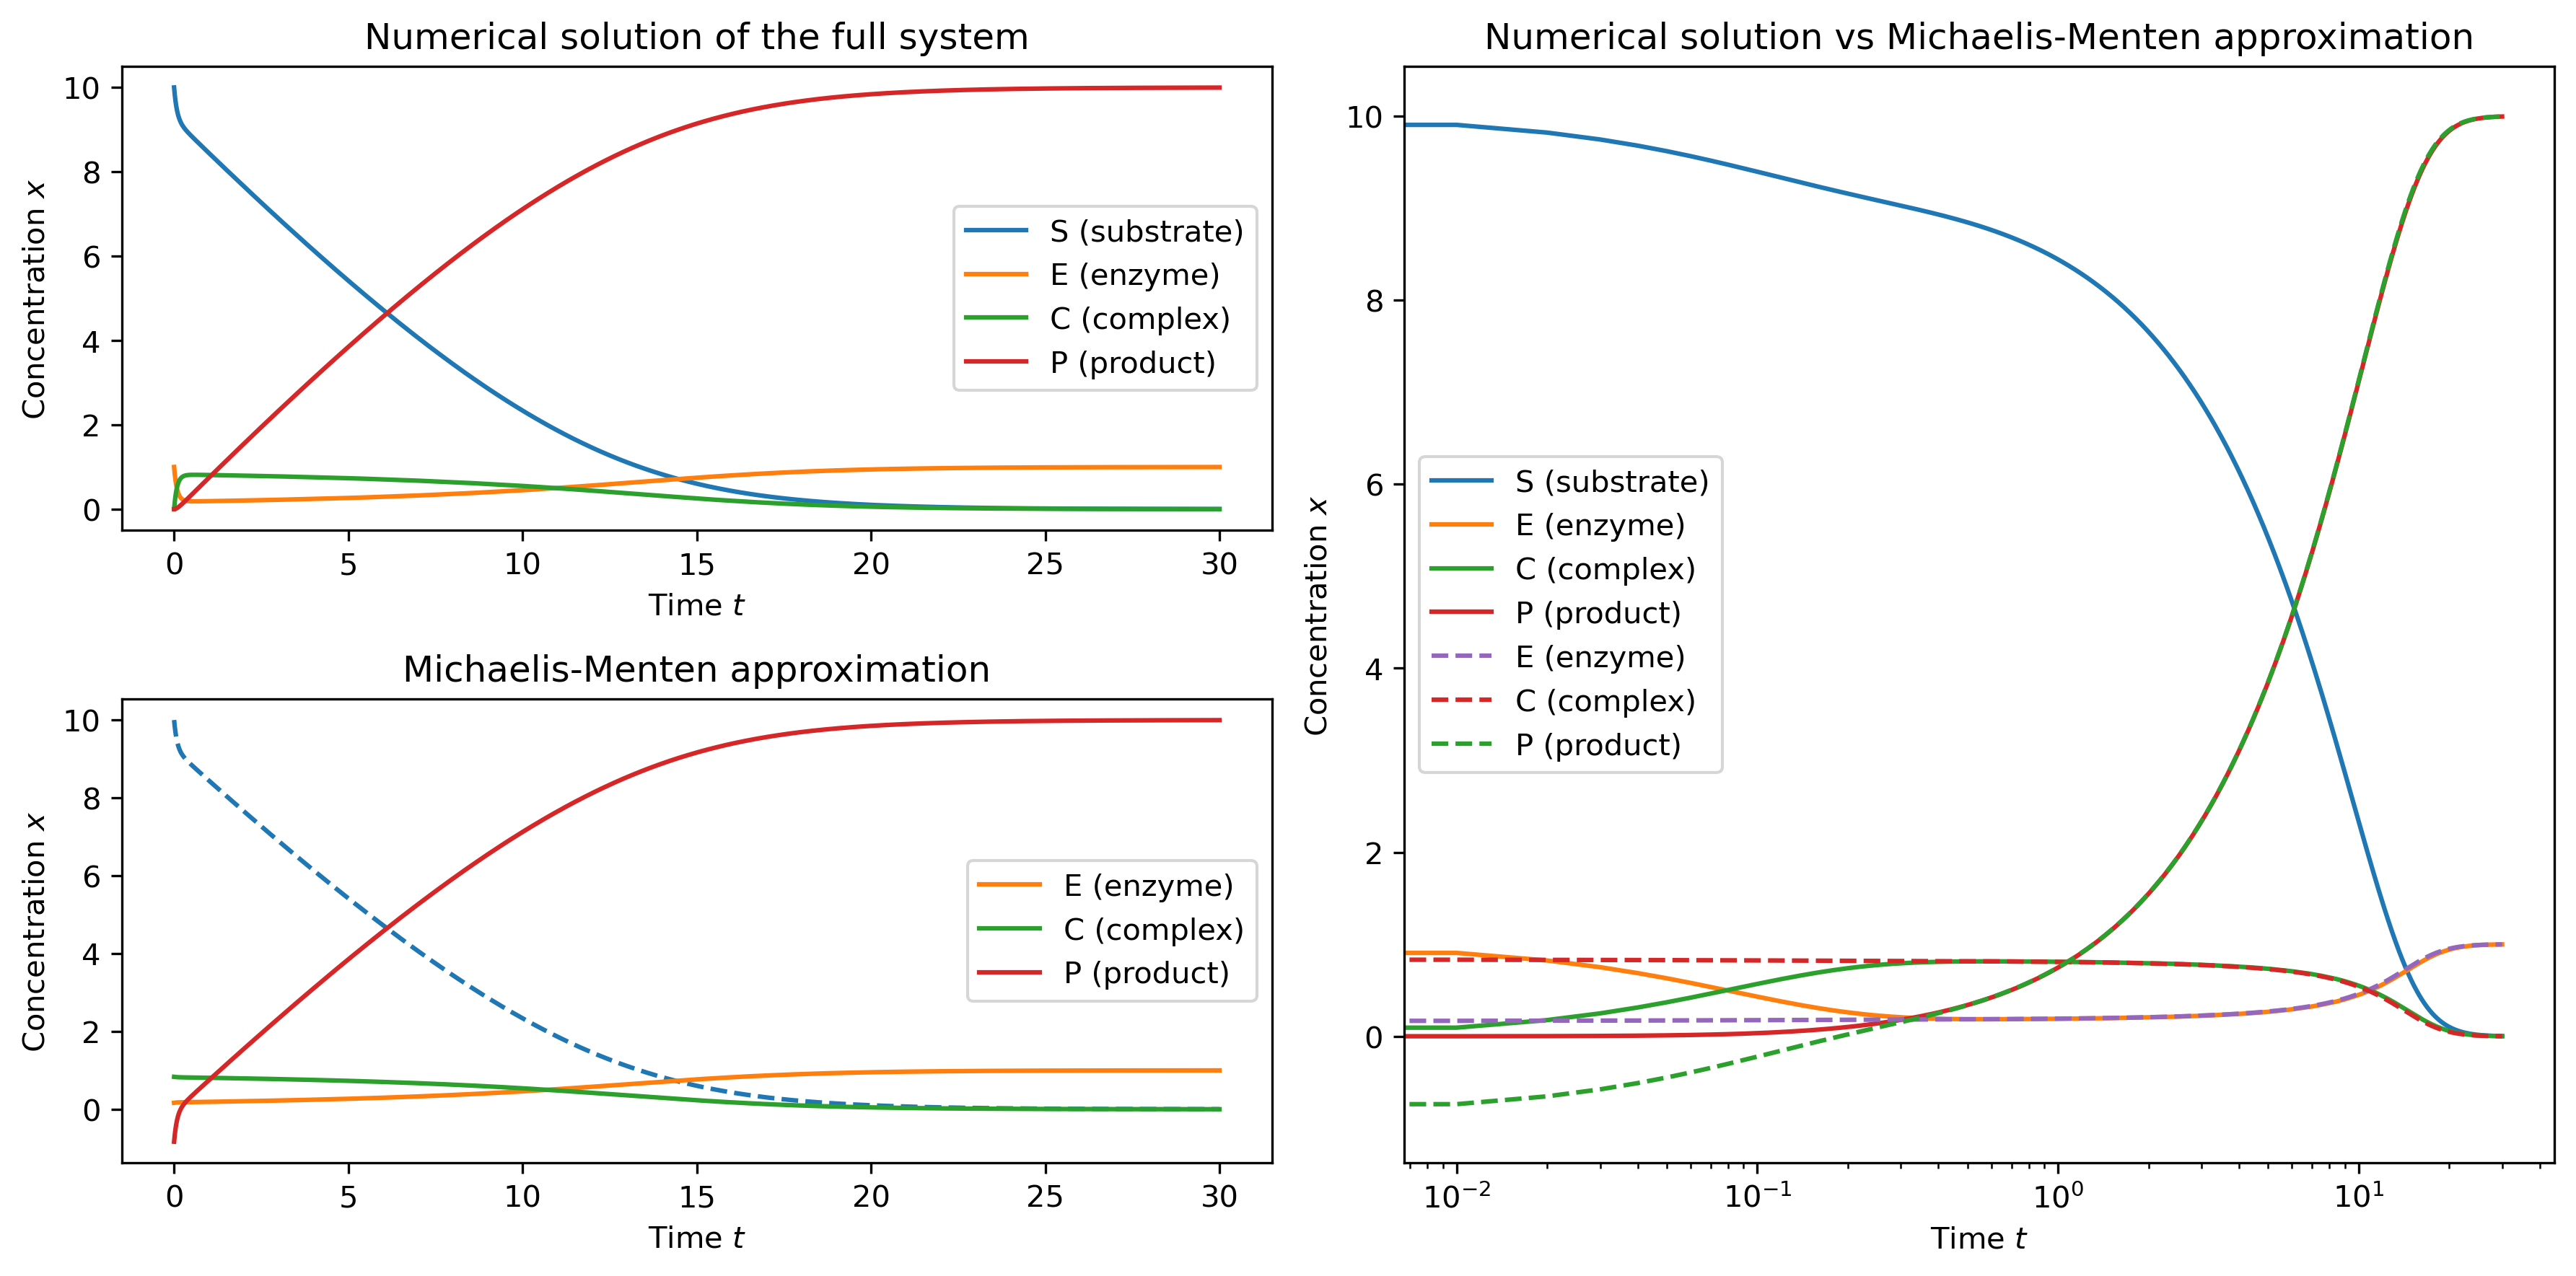

In [51]:
# PLOT THE FIGURE
fig.tight_layout()
fig